# Importing Libraries

In [41]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import nltk
import twint
import string
import re
import aiohttp
import unicodedata
import nest_asyncio
nest_asyncio.apply()
string.punctuation
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to /Users/hilmi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Defining Functions, to be merged into scraping.py

In [49]:
def text_cleaning (text):
    text = re.sub(r'^https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
    unicode_text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    text_punc_removed = [char for char in text if char not in string.punctuation]
    text_punc_removed_join = ''.join(text_punc_removed)
    text_punc_removed_clean = [word for word in text_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return text_punc_removed_clean

class Twitter:
    
    def __init__(self, keyword, location, start_date, end_date):
        self.search_word = keyword
        self.location = location
        self.start_date = start_date #"YYYY-MM-DD"
        self.end_date = end_date     #"YYYY-MM-DD"

    def get_tweets(self):
        c = twint.Config()
        c.Lang = "en"
        c.Search = self.search_word
        c.Near = self.location
        c.Since = self.start_date #"YYYY-MM-DD"
        c.Until = self.end_date   #"YYYY-MM-DD"
        c.Hide_output = True
        c.Store_csv = True
        c.Output = "{}_{}.csv".format(self.location, self.search_word)
        twint.run.Search(c)
        try: 
            if "{}_{}.csv".format(self.location, self.search_word):
                tweets_df = pd.read_csv("{}_{}.csv".format(self.location, self.search_word))
                return [tweets for tweets in tweets_df['tweet']]
        except:
            return("No tweets related to {} availlable in {} between {} and {}".format(self.search_word, self.location, self.start_date, self.end_date))
       
    def visualize_tweets(self):
        try: 
            if "{}_{}.csv".format(self.location, self.search_word):
                tweets_df = pd.read_csv('{}_{}.csv'.format(self.location, self.search_word),parse_dates=['created_at'])
                grp = tweets_df.groupby(pd.Grouper(freq='1H', key='created_at'))
                plt.figure(figsize=(12,6))
                plt.plot(grp.count()['id'])
                plt.ylabel('Tweets per hour', color = 'red')
                plt.title("{} {} Tweets Per Hour".format(self.location, self.search_word),  color = 'red')
                return plt.show()
        except:
            return("No visualization is available related to {} in {} between {} and {}".format(self.search_word, self.location, self.start_date, self.end_date))
        
        
        
        
    def clean_tweets(self):
        if "{}_{}.csv".format(self.location, self.search_word):
            tweets_df = pd.read_csv('{}_{}.csv'.format(self.location, self.search_word))
            tweets_df['cleaned_tweet'] = tweets_df['tweet'].apply(text_cleaning)
            tweets_df.to_csv('{}_{}_cleaned.csv'.format(self.location, self.search_word))
            tweets_df_shw = tweets_df[["tweet", "cleaned_tweet"]]
            return tweets_df_shw 
        else:
            return("No tweets related to {} availlable in {} between {} and {}".format(self.search_word, self.location, self.start_date, self.end_date))

            
    def wordcloud_tweets(self):
        try:
            if "{}_{}.csv".format(self.location, self.search_word):
                tweets_df = pd.read_csv('{}_{}_cleaned.csv'.format(self.location, self.search_word))
                sentences = tweets_df['cleaned_tweet'].apply(''.join)
                sentences_as_one_string =' '.join(sentences)
                plt.figure(figsize = (20,20))
                return plt.imshow(WordCloud().generate(sentences_as_one_string))
        except:
            return("No WordCloud is available related to {} in {} between {} and {}".format(self.search_word, self.location, self.start_date, self.end_date))

            
    
    def classify_tweets(self):
        #NLP Classification
        pass

In [50]:
text = 'https?://?\\\hcbwkdbc Ankaradan abim gelmis'
text_cleaning(text)

['httpshcbwkdbc', 'Ankaradan', 'abim', 'gelmis']

# Function Samples

In [58]:
twitter = Twitter("flooding", "France", '2021-06-22','2021-06-24' )

In [59]:
twitter.get_tweets()

[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.


["@educationgovuk @1Britain1Nation Tolerance they say.  We literally left the EU because we couldn't tolerate immaginary asylum seekers flooding our shores",
 '@WHCOS Why is there not people flooding the zeitgeist with this info and tie it to voting rights.',
 'A friend of a friend recently had their home destroyed by flooding and lost most of their belongings. Please retweet this if you see it.  https://t.co/skMo8ghYcZ',
 '@SeeUnext2sday 2007 was worse for flooding but yep',
 'black butter be flooding the timeline with ads..',
 '@Solar_Hex that flooring is so pretty i’m jealous',
 '@liliefleur Same here in the UK but for flooding I’am lucky I don’t live in an area that floods but those that do ( and there’s a lot) can’t get any insurance at all !!',
 'Flooding the deserts won\'t help stop global warming....but would probably happen at some point, given the claims, these scientists predict "COULD" happen, if global warming continues. (May be its snake oil thinking, for funds and elitis

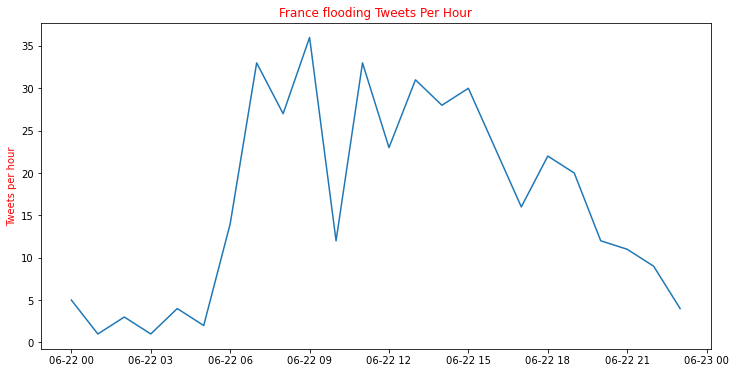

In [60]:
twitter.visualize_tweets()

In [61]:
twitter.clean_tweets()

,tweet,cleaned_tweet
0,@educationgovuk @1Britain1Nation Tolerance the...,"[educationgovuk, 1Britain1Nation, Tolerance, s..."
1,@WHCOS Why is there not people flooding the ze...,"[WHCOS, people, flooding, zeitgeist, info, tie..."
2,A friend of a friend recently had their home d...,"[friend, friend, recently, home, destroyed, fl..."
3,@SeeUnext2sday 2007 was worse for flooding but...,"[SeeUnext2sday, 2007, worse, flooding, yep]"
4,black butter be flooding the timeline with ads..,"[black, butter, flooding, timeline, ads]"
...,...,...
395,Why am i flooding faves mentions😭😭,"[flooding, faves, mentions😭😭]"
396,@UptownMessenger Just a hunch that flooding is...,"[UptownMessenger, hunch, flooding, much, worse..."
397,"Very cool, it went from nearly flooding and de...","[cool, went, nearly, flooding, destroying, tow..."
398,@cameron_wilkie1 broooo i remember him omg!!! ...,"[cameronwilkie1, broooo, remember, omg, memori..."


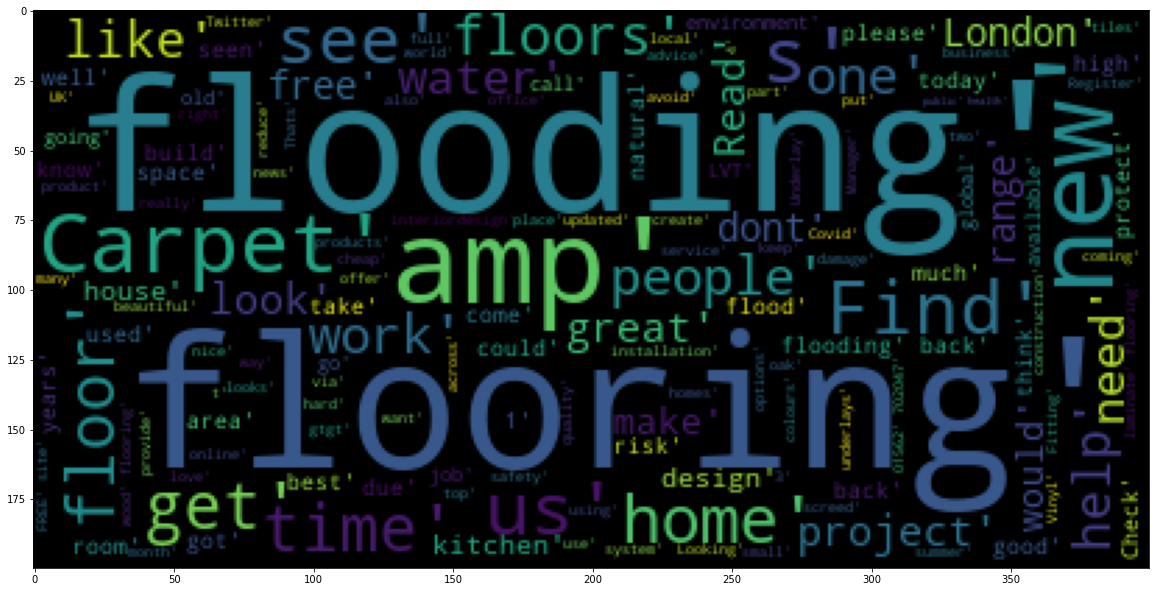

In [62]:
twitter.wordcloud_tweets()

# Scraper function,  will be merged into Scraper Class in scraping.py

In [56]:
 def twitter_scraper(keyword, location, start_date, end_date):
        """
        Scrape Twitter for tweets about this event.
        `query_event` holds what info the user is querying about, such as
        what event type (flood, drought,..), what time, what location
        The output is a list of pieces of content about such event
        """
        # TODO: implement
        # 1. add calls to perfom the query
        # 1. add data wrangling/cleaning steps
        
        twitter = Twitter(keyword, location, start_date, end_date)
 
    
        if twitter.get_tweets()==("No tweets related to {} availlable in {} between {} and {}".format(keyword, location, start_date, end_date)):
            return "No tweets related to {} availlable in {} between {} and {}".format(self.search_word, self.location, self.start_date, self.end_date)
        else:
            return (twitter.visualize_tweets(), twitter.clean_tweets(), twitter.wordcloud_tweets(),twitter.classify_tweets())
    


[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.


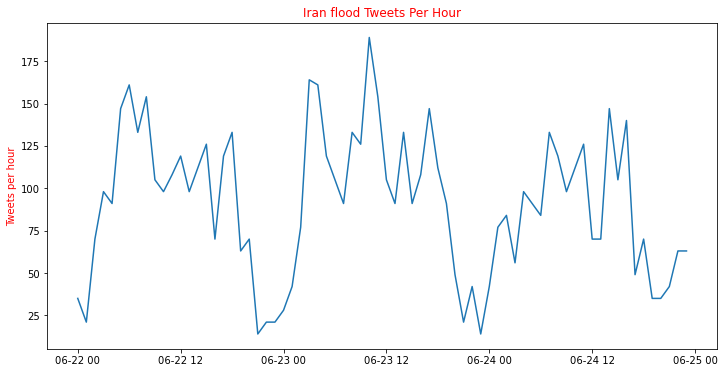

(None,
                                                   tweet  \
 0     Speaking of ballot measures, in 1963 around 40...   
 1     The place all start dey flood as soon as I lef...   
 2     Canlı yayında bahsettiğim bilgiseli/flood. Vah...   
 3     Floods in Cotonou: IDB grants $ 105.6 million ...   
 4     Flood, Kasganj news, flood news, flood in Kasg...   
 ...                                                 ...   
 6584  बास्तबमा असारमा बजेट दिने काम रोक्नुपर्छ! यो स...   
 6585  অবশেষে স্বস্তি ফিরছে...  #DurgapurBarrage #flo...   
 6586  দেখার কেউ নেই! নৌকায় চলছে ঝুঁকির যাতায়াত... ...   
 6587  #Asphalt9Legends I swear to god, when I did th...   
 6588  The mudslide in the area sound to be the origi...   
 
                                           cleaned_tweet  
 0     [Speaking, ballot, measures, 1963, around, 40,...  
 1          [place, start, dey, flood, soon, left, safe]  
 2     [Canlı, yayında, bahsettiğim, bilgiseliflood, ...  
 3     [Floods, Cotonou, IDB, grant

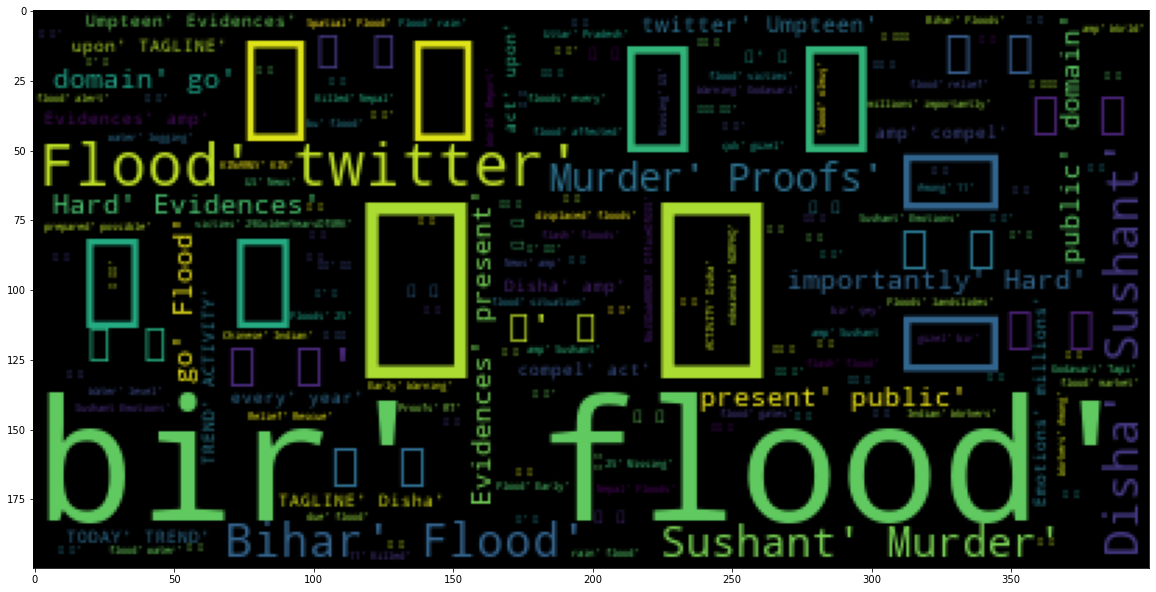

In [57]:
twitter_scraper("flood", "Iran", "2021-06-22","2021-06-26")

In [ ]:

class Scraper:
    def __init__(self, query_event: QueryedEvent):
        self.query_event = query_event

    def news_scraper(self) -> List[CandidateEvent]:
        """
        Scrape Google News for articles about this event.
        `query_event` holds what info the user is querying about, such as
        what event type (flood, drought,..), what time, what location
        The output is a list of pieces of content about such event
        """

        n = Newspaper(
            dict(
                search_word=f"{q.event_type.value} in {q.location}",
                start_date=self.query_event.time_start,
                end_date=self.query_event.time_end,
            )
        )

        articles = [get_article_content(x) for x in n.get_links()]

        return [
            CandidateEvent(
                text=a["title"],
                time=a["publish_date"],
                url=a["url"],
                image=article["image"],
            )
            for a in articles
        ]

    def fb_scraper(self) -> List[CandidateEvent]:
        """
        Scrape Facebook for posts about this event.
        `query_event` holds what info the user is querying about, such as
        what event type (flood, drought,..), what time, what location
        The output is a list of pieces of content about such event
        """

        # TODO: implement
        # 1. add calls to perfom the query
        # 1. add data wrangling/cleaning steps
        return []

    def ig_scraper(self) -> List[CandidateEvent]:
        """
        Scrape Facebook for posts about this event.
        `query_event` holds what info the user is querying about, such as
        what event type (flood, drought,..), what time, what location
        The output is a list of pieces of content about such event
        """

        # TODO: implement
        # 1. add calls to perfom the query
        # 1. add data wrangling/cleaning steps
        return []

    def twiter_scraper(self) -> List[CandidateEvent]:
        """
        Scrape Twitter for tweets about this event.
        `query_event` holds what info the user is querying about, such as
        what event type (flood, drought,..), what time, what location
        The output is a list of pieces of content about such event
        """
        # TODO: implement
        # 1. add calls to perfom the query
        # 1. add data wrangling/cleaning steps
    
        return  []
                
                 

    def run_all_scrapers(self) -> List[CandidateEvent]:
        """
        one wrapper-funciton to call each individual scraper method.
        (Ideally, scrapers would run async)
        """

        return (
            self.news_scraper()
            + self.fb_scraper()
            + self.ig_scraper()
            + self.twiter_scraper()
        )
